# Table of contents

##
![brown-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# Import Library

In [846]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

##
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# Loading Data

In [847]:
stroke = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

##
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# 1. Data Preprocessing

In [848]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [849]:
stroke.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [850]:
stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

 *The Age columns have a type float64 that mean inside data have a float number rows*

In [851]:
stroke[stroke['age']<2]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
562,45238,Female,1.80,0,0,No,children,Urban,58.26,16.5,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4934,32147,Male,1.32,0,0,No,children,Rural,107.02,NaN,Unknown,0
5032,67426,Female,1.24,0,0,No,children,Rural,61.94,20.3,Unknown,0
5079,42709,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0


In [852]:
stroke['age']=stroke['age'].astype(int)
stroke['age']=stroke['age'].replace([0],1)
stroke[stroke['age']<=9]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1,0,0,No,children,Urban,70.37,NaN,Unknown,1
249,30669,Male,3,0,0,No,children,Rural,95.12,18.0,Unknown,0
251,16523,Female,8,0,0,No,Private,Urban,110.89,17.6,Unknown,0
282,33759,Female,3,0,0,No,children,Urban,73.74,16.0,Unknown,0
291,11014,Male,4,0,0,No,children,Rural,79.17,20.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5078,27446,Female,8,0,0,No,children,Urban,76.31,15.5,Unknown,0
5079,42709,Male,1,0,0,No,children,Urban,77.28,17.1,Unknown,0
5089,56714,Female,1,0,0,No,children,Rural,62.13,16.8,Unknown,0
5095,68598,Male,1,0,0,No,children,Rural,79.15,17.4,Unknown,0


  ##### *At the smoking_status columns, from 1 to 9 years old, the data set has the value 'Unknown', So I did a search and statistic that in children under 10, the smoking rate seems to be less than <1%*
   > [Children and young people use tobacco](https://www.blackpooljsna.org.uk/Home.aspx)



In [853]:
df=stroke[(stroke['age']<=9) & (stroke['smoking_status']=='Unknown')]
df['smoking_status']=df['smoking_status'].replace(['Unknown'],'never smoked')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1,0,0,No,children,Urban,70.37,NaN,never smoked,1
249,30669,Male,3,0,0,No,children,Rural,95.12,18.0,never smoked,0
251,16523,Female,8,0,0,No,Private,Urban,110.89,17.6,never smoked,0
282,33759,Female,3,0,0,No,children,Urban,73.74,16.0,never smoked,0
291,11014,Male,4,0,0,No,children,Rural,79.17,20.0,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5078,27446,Female,8,0,0,No,children,Urban,76.31,15.5,never smoked,0
5079,42709,Male,1,0,0,No,children,Urban,77.28,17.1,never smoked,0
5089,56714,Female,1,0,0,No,children,Rural,62.13,16.8,never smoked,0
5095,68598,Male,1,0,0,No,children,Rural,79.15,17.4,never smoked,0


In [854]:
df1=stroke[(stroke['age']<=9) & (stroke['smoking_status']!='Unknown')|(stroke['age']>9)]

In [855]:
stroke=pd.concat([df,df1])

In [856]:
stroke.shape

(5110, 12)

In [857]:
stroke[stroke['age']==1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1,0,0,No,children,Urban,70.37,NaN,never smoked,1
363,7559,Female,1,0,0,No,children,Urban,83.82,24.9,never smoked,0
376,22706,Female,1,0,0,No,children,Rural,88.11,15.5,never smoked,0
562,45238,Female,1,0,0,No,children,Urban,58.26,16.5,never smoked,0
564,61511,Female,1,0,0,No,children,Rural,73.71,16.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4934,32147,Male,1,0,0,No,children,Rural,107.02,NaN,never smoked,0
5032,67426,Female,1,0,0,No,children,Rural,61.94,20.3,never smoked,0
5079,42709,Male,1,0,0,No,children,Urban,77.28,17.1,never smoked,0
5089,56714,Female,1,0,0,No,children,Rural,62.13,16.8,never smoked,0


In [858]:
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_never smoked,work_type_Private,work_type_Self-employed,work_type_children
162,69768,Female,1,0,0,No,Urban,70.37,NaN,1,1,0,0,1
249,30669,Male,3,0,0,No,Rural,95.12,18.0,0,1,0,0,1
251,16523,Female,8,0,0,No,Urban,110.89,17.6,0,1,1,0,0
282,33759,Female,3,0,0,No,Urban,73.74,16.0,0,1,0,0,1
291,11014,Male,4,0,0,No,Rural,79.17,20.0,0,1,0,0,1


*The column BMI is missing data, so i need to solve this problem*

In [859]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

At this data, we have 201/5110 percent for missing data at BMI column. its approximate 4% data, so i think the best way is filling missing values by mean

In [860]:
null_df = stroke[stroke['bmi'].isnull()]
# type(null_df['bmi'])

In [861]:
mean=stroke['bmi'].mean(skipna=True)
stroke['bmi']=stroke['bmi'].mask(stroke['bmi'].isnull(),mean)

In [862]:
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Show all unique classes

In [863]:
for col in stroke.columns:
    if(stroke.dtypes[col]=='O'):
        print('-----------------------\n',stroke[col].value_counts())

-----------------------
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
-----------------------
 Yes    3353
No     1757
Name: ever_married, dtype: int64
-----------------------
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
-----------------------
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
-----------------------
 never smoked       2364
Unknown            1072
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


#### Drop the Unsual from the datase

In [864]:
stroke=stroke.drop(columns='id',axis=1)

In [865]:
stroke.drop(stroke.loc[stroke['smoking_status']=='Unknown'].index, inplace=True)
stroke.shape

(4038, 11)

In [866]:
stroke = stroke[stroke['gender']!='Other']

In [867]:
stroke=stroke.reset_index(drop=True)

In [868]:
stroke_Final=stroke.copy()

#### Encoding Categorical Features

In [869]:
stroke["Residence_type"] = stroke["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
stroke["ever_married"] = stroke["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
stroke["gender"] = stroke["gender"].apply(lambda x: 1 if x=="Male" else 0)

In [870]:
stroke = pd.get_dummies(data=stroke, columns=['smoking_status'])
stroke = pd.get_dummies(data=stroke, columns=['work_type'])

In [871]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,0,0,0,1,70.37,28.893237,1,0,1,0,0,0,0,0,1
1,1,3,0,0,0,0,95.12,18.000000,0,0,1,0,0,0,0,0,1
2,0,8,0,0,0,1,110.89,17.600000,0,0,1,0,0,0,1,0,0
3,0,3,0,0,0,1,73.74,16.000000,0,0,1,0,0,0,0,0,1
4,1,4,0,0,0,0,79.17,20.000000,0,0,1,0,0,0,0,0,1


In [872]:
stroke_Final.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,1,0,0,No,children,Urban,70.37,28.893237,never smoked,1
1,Male,3,0,0,No,children,Rural,95.12,18.000000,never smoked,0
2,Female,8,0,0,No,Private,Urban,110.89,17.600000,never smoked,0
3,Female,3,0,0,No,children,Urban,73.74,16.000000,never smoked,0
4,Male,4,0,0,No,children,Rural,79.17,20.000000,never smoked,0


##
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# 2. Visualization

## Count stroke

In [873]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df = df[df['gender'] != 'Other']
df.rename({'Residence_type': 'residence_type'}, axis=1, inplace=True)
mean = df['bmi'].mean(skipna=True)
df['bmi']= df['bmi'].mask(df['bmi'].isnull(), mean)
df.drop(columns=['id', 'ever_married', 'work_type', 'residence_type', 'smoking_status'], inplace=True)

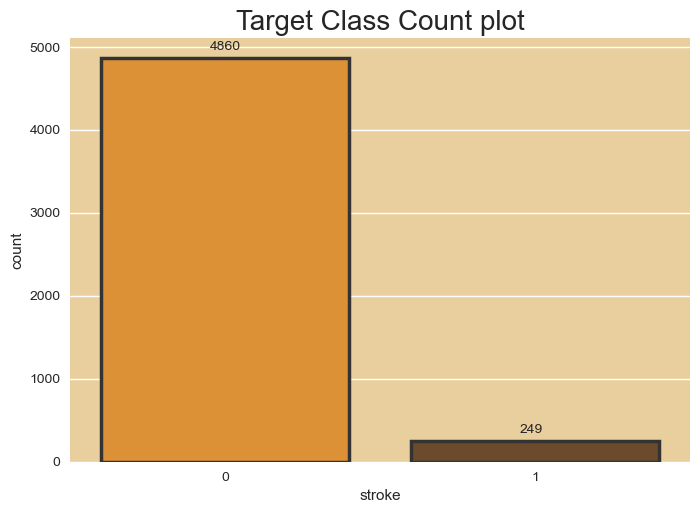

In [874]:
ax = sns.countplot(data=df, x='stroke', edgecolor='0.2', lw=2.5,  palette=["#F7941C", "#764A23"])
ax.set_facecolor('#E9CF9D')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+100)) for p in ax.patches]
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.title('Target Class Count plot', fontsize=20)
plt.show()

## Age Distribution

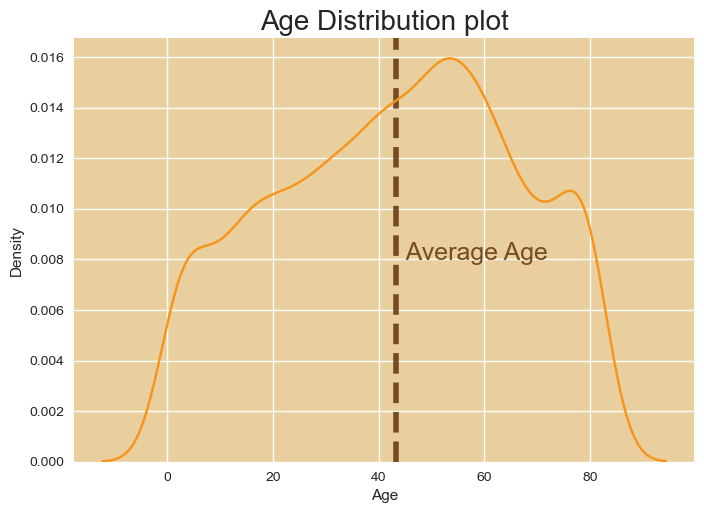

In [875]:
ax = sns.kdeplot(df['age'], color='lightgray')
ax.set_facecolor('#E9CF9D')
ax.lines[0].set_color('#F7941C')
plt.axvline(df['age'].mean(), linestyle='--', lw=4, zorder=1, color='#764A23')
plt.annotate(f' Average Age', (44, 0.008), fontsize=18,color='#764A23')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Age Distribution plot', fontsize=20)
plt.xlabel('Age')
plt.show()

### Gender

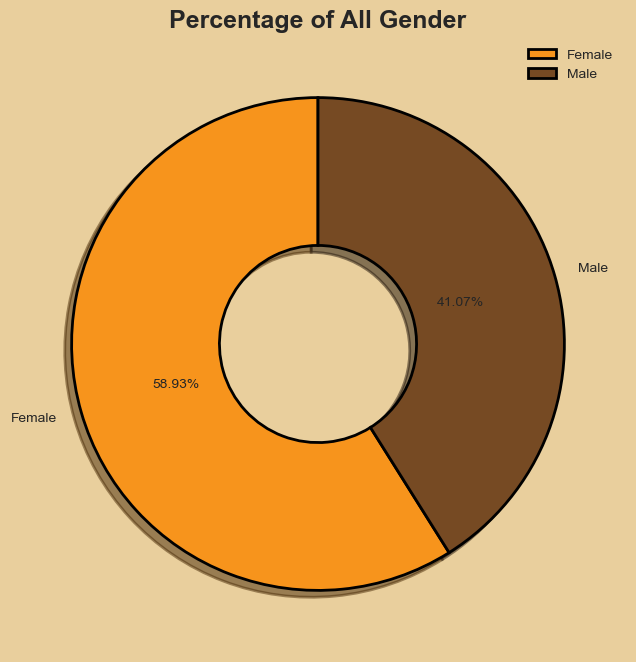

In [876]:
fig, ax = plt.subplots(figsize = (8,8))
labels = [ 'Female','Male']
plt.pie(stroke_Final["gender"].value_counts(),autopct='%1.2f%%',labels=labels , radius =1, colors=["#F7941C", "#764A23"], shadow = True, startangle = 90, wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True,
                      "width":0.6})
plt.title("Percentage of All Gender",fontsize=18,fontweight="bold" )
fig.set_facecolor('#E9CF9D')
plt.legend()
plt.show()

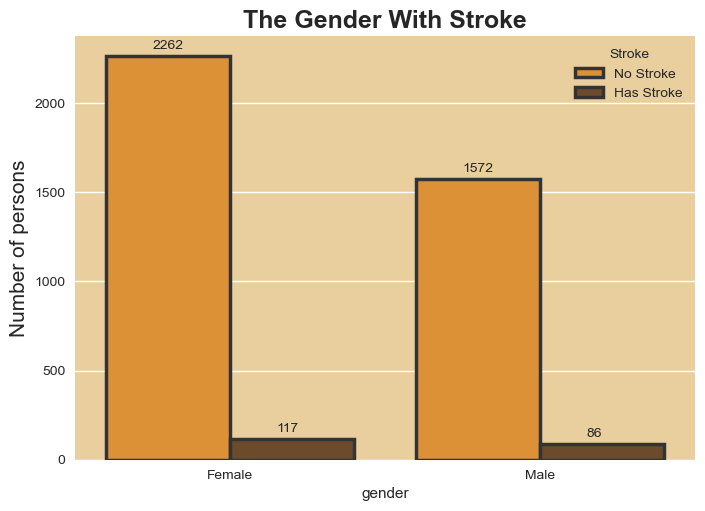

In [877]:
ax=sns.countplot(x='gender', data=stroke_Final, hue =stroke_Final['stroke'], edgecolor='0.2', lw=2.5,  palette=["#F7941C", "#764A23"])
ax.set_facecolor('#E9CF9D')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in ax.patches]
plt.title("The Gender With Stroke",fontsize=18,fontweight="bold")
plt.ylabel('Number of persons',fontsize=15)
plt.legend(['No Stroke','Has Stroke'],title='Stroke')

### BOXPLOT with three feature AGE, BMI , AVG_GLUTCOSE_LEVEL

In [878]:
Have_stroke=stroke_Final[stroke_Final['stroke']==1]
Non_stroke=stroke_Final[stroke_Final['stroke']==0]

In [879]:
stroke_Final["index"]= range(1, len(stroke_Final) + 1)
Have_stroke["index"]= range(1, len(Have_stroke) + 1)
Non_stroke["index"]= range(1, len(Non_stroke) + 1)

##### *Three features when has a stroke*

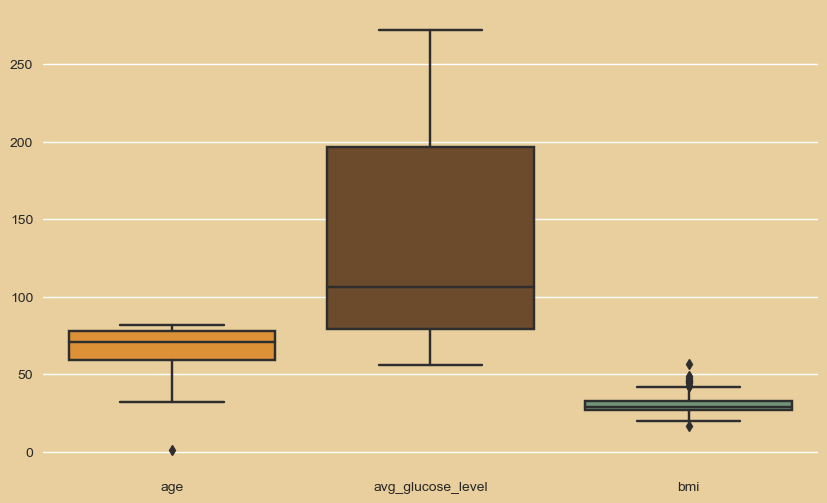

In [880]:
col=['age','avg_glucose_level','bmi']
plt.figure(figsize=(10,6), facecolor="#E9CF9D")
ax=sns.boxplot(data=stroke_Final[stroke_Final['stroke']==1][col],  palette=["#F7941C", "#764A23", "#6C9A76"])
ax.set_facecolor('#E9CF9D')
plt.show()

##### *Three features when there is no a stroke*

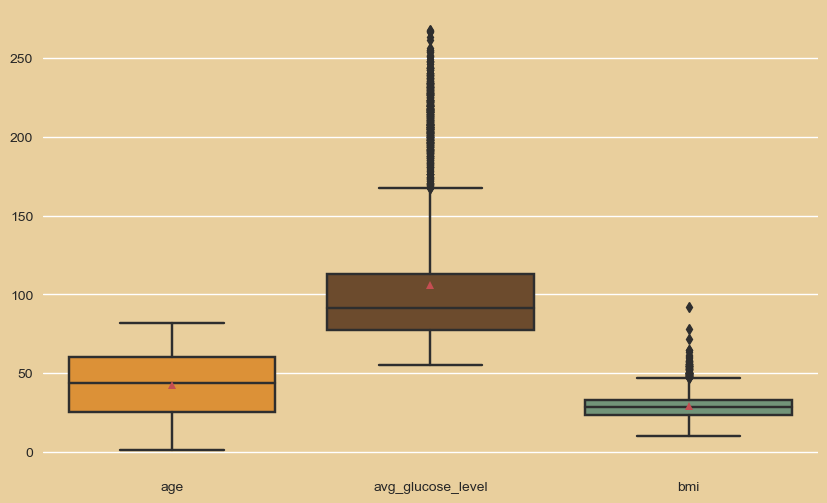

In [881]:
col=['age','avg_glucose_level','bmi']
plt.figure(figsize=(10,6), facecolor="#E9CF9D")
ax=sns.boxplot(data=stroke_Final[stroke_Final['stroke']==0][col],   showmeans=True, palette=["#F7941C", "#764A23", "#6C9A76"])
ax.set_facecolor('#E9CF9D')
plt.show()

### Hypertension

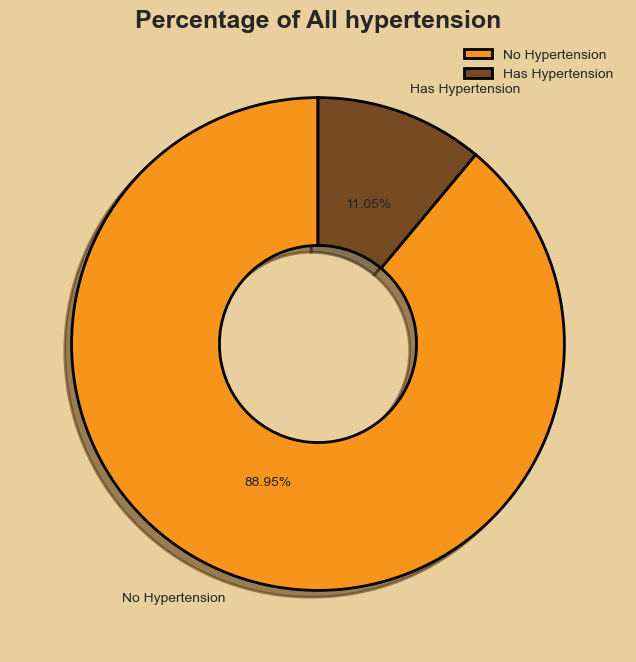

In [882]:
labels = ['No Hypertension', 'Has Hypertension']
fig, ax = plt.subplots(figsize = (8,8))
plt.pie(stroke_Final["hypertension"].value_counts(),autopct='%1.2f%%',labels=labels,radius =1, colors=["#F7941C", "#764A23"], shadow = True, startangle = 90, wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True,
                      "width":0.6})
plt.title("Percentage of All hypertension",fontsize=18,fontweight="bold")
fig.set_facecolor('#E9CF9D')
plt.legend()
plt.show()

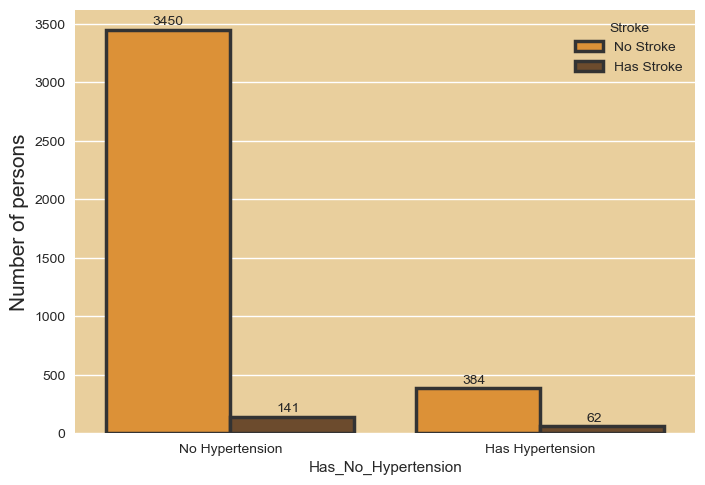

In [883]:
Object={0:"No Hypertension",1:"Has Hypertension"}
stroke_Final["Has_No_Hypertension"]=stroke_Final['hypertension']
stroke_Final['Has_No_Hypertension']=stroke_Final['Has_No_Hypertension'].map(Object)
ax=sns.countplot(x='Has_No_Hypertension', data=stroke_Final, hue =stroke_Final['stroke'], edgecolor='0.2', lw=2.5,  palette=["#F7941C", "#764A23"])
ax.set_facecolor('#E9CF9D')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in ax.patches]
plt.ylabel('Number of persons',fontsize=15)
plt.legend(['No Stroke','Has Stroke'],title='Stroke')
plt.show()

### Heart_disease

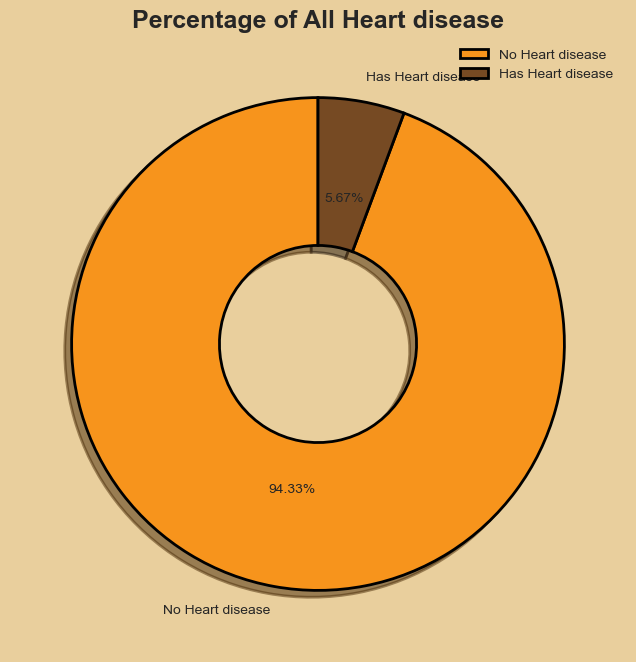

In [884]:
labels = ['No Heart disease', 'Has Heart disease']
fig, ax = plt.subplots(figsize = (8,8))
ax=plt.pie(stroke_Final["heart_disease"].value_counts(),autopct='%1.2f%%', labels=labels, radius =1,colors=[ "#F7941C", "#764A23"], shadow = True, startangle = 90, wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True,
                      "width":0.6})

plt.title("Percentage of All Heart disease",fontsize=18,fontweight="bold")
fig.set_facecolor('#E9CF9D')
plt.legend()
plt.show()

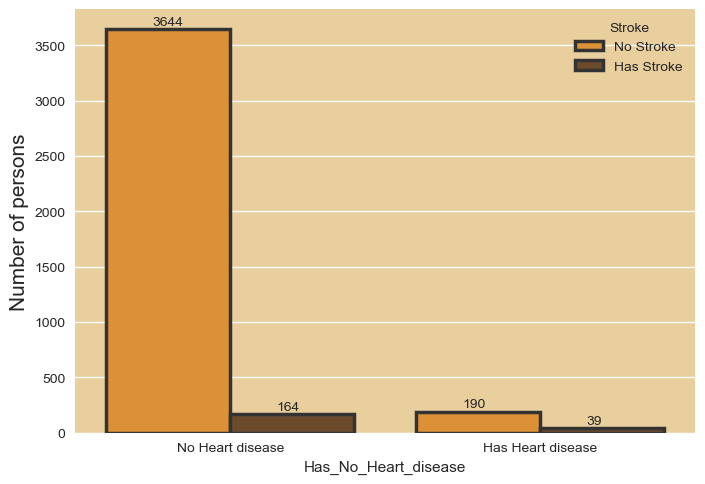

In [885]:
Object={0:"No Heart disease",1:"Has Heart disease"}
stroke_Final["Has_No_Heart_disease"]=stroke_Final['heart_disease']
stroke_Final['Has_No_Heart_disease']=stroke_Final['Has_No_Heart_disease'].map(Object)
ax=sns.countplot(x='Has_No_Heart_disease', data=stroke_Final, hue =stroke_Final['stroke'], edgecolor='0.2', lw=2.5,  palette=["#F7941C", "#764A23"])
ax.set_facecolor('#E9CF9D')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in ax.patches]
plt.ylabel('Number of persons',fontsize=15)
plt.legend(['No Stroke','Has Stroke'],title='Stroke')
plt.show()

### Ever married

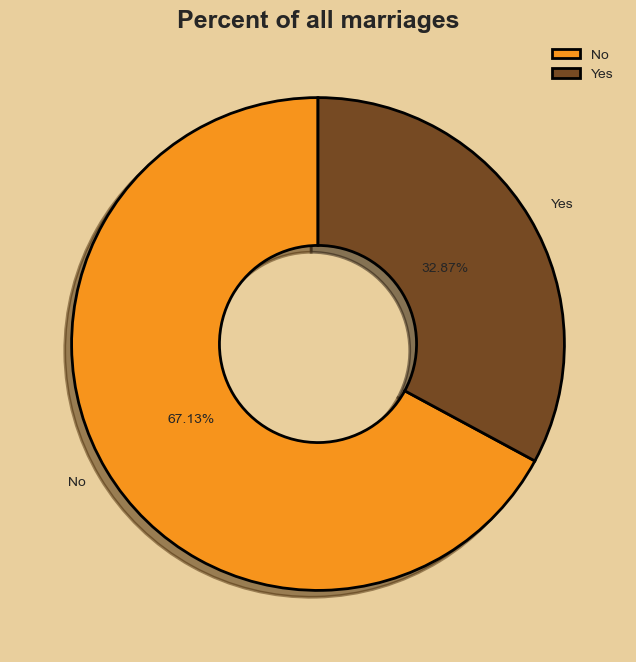

In [886]:
labels = ['No', 'Yes']
fig, ax = plt.subplots(figsize = (8,8))
plt.pie(stroke_Final["ever_married"].value_counts(),autopct='%1.2f%%',labels=labels, radius =1, colors=["#F7941C", "#764A23"], shadow = True, startangle = 90, wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True,
                      "width":0.6})
plt.title("Percent of all marriages",fontsize=18,fontweight="bold")
fig.set_facecolor('#E9CF9D')
plt.legend()
plt.show()

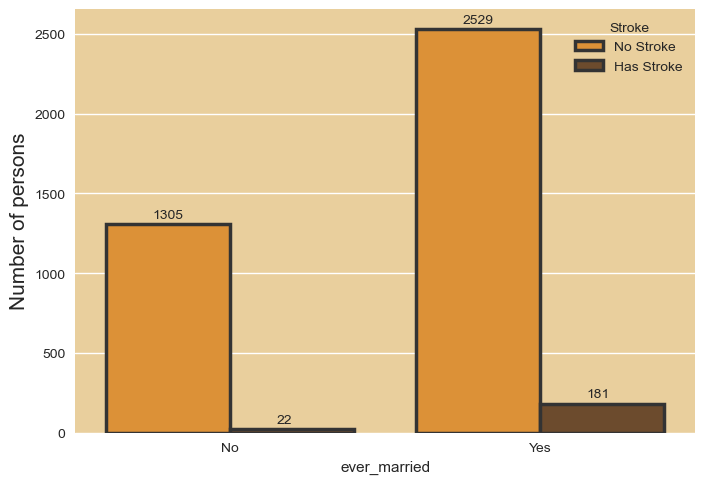

In [887]:
ax=sns.countplot(x='ever_married', data=stroke_Final, hue =stroke_Final['stroke'], edgecolor='0.2', lw=2.5,  palette=["#F7941C", "#764A23"])
ax.set_facecolor('#E9CF9D')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in ax.patches]
plt.ylabel('Number of persons',fontsize=15)
plt.legend(['No Stroke','Has Stroke'],title='Stroke')
plt.show()

### Work type

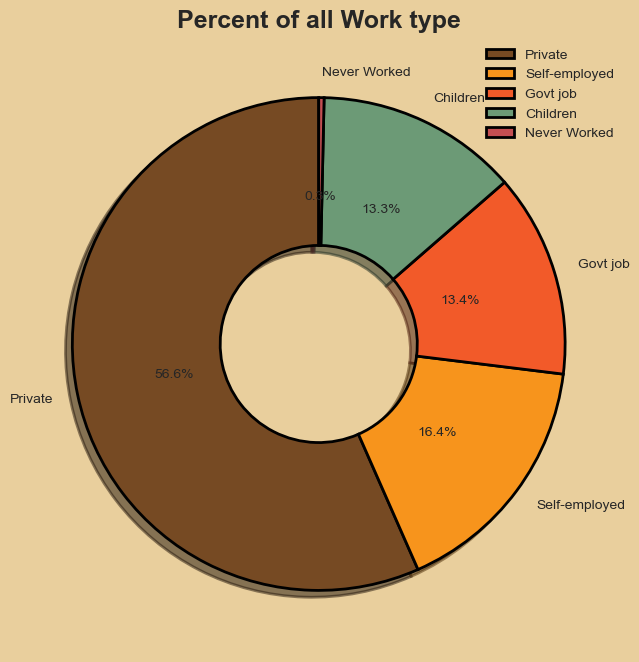

In [888]:
labels = ['Private', 'Self-employed', 'Govt job', 'Children','Never Worked']
fig, ax = plt.subplots(figsize = (8,8))
plt.pie(stroke_Final["work_type"].value_counts(),labels=labels, autopct='%1.1f%%',radius =1,colors=[ "#764A23", "#F7941C","#F25A29","#6C9A76", "#C44F52"], shadow = True, startangle = 90, wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True,
                      "width":0.6})
plt.title("Percent of all Work type",fontsize=18,fontweight="bold")
fig.set_facecolor('#E9CF9D')
plt.legend()
plt.show()

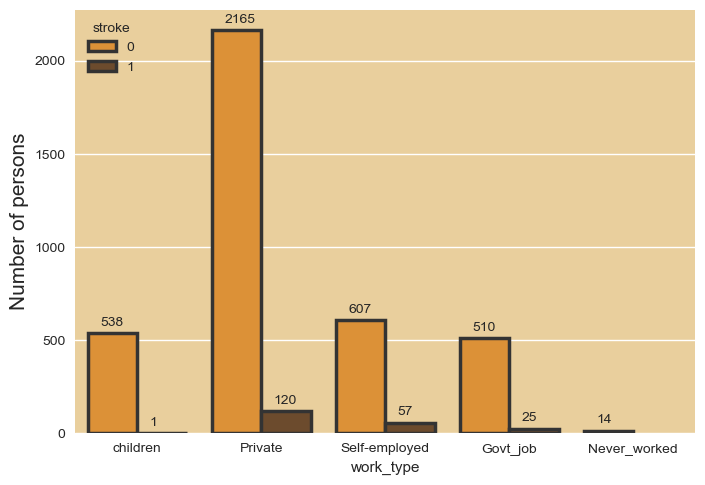

In [889]:
ax=sns.countplot(x='work_type', data=stroke_Final, hue =stroke_Final['stroke'], edgecolor='0.2', lw=2.5,  palette=["#F7941C", "#764A23"])
ax.set_facecolor('#E9CF9D')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+40)) for p in ax.patches]
plt.ylabel('Number of persons',fontsize=15)
plt.show()

### Residence_type

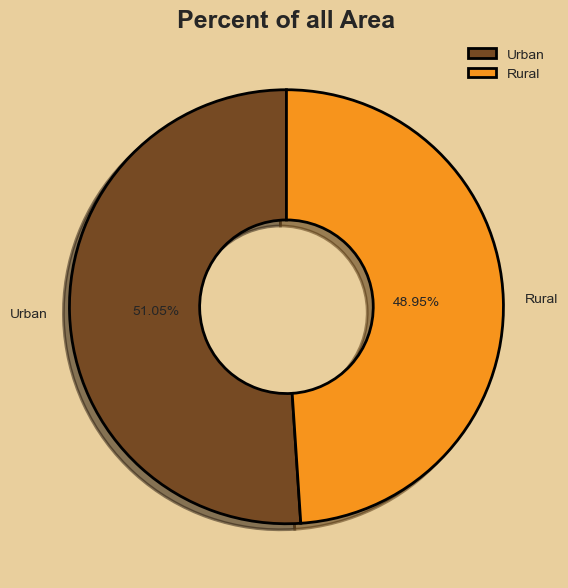

In [890]:
labels = ['Urban', 'Rural']
fig, ax = plt.subplots(figsize = (7,8))
plt.pie(stroke_Final["Residence_type"].value_counts(),autopct='%1.2f%%', labels=labels, radius =1,colors=["#764A23", "#F7941C"], shadow = True, startangle = 90, wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True,
                      "width":0.6})
plt.title("Percent of all Area",fontsize=18,fontweight="bold")
fig.set_facecolor('#E9CF9D')
plt.legend()
plt.show()

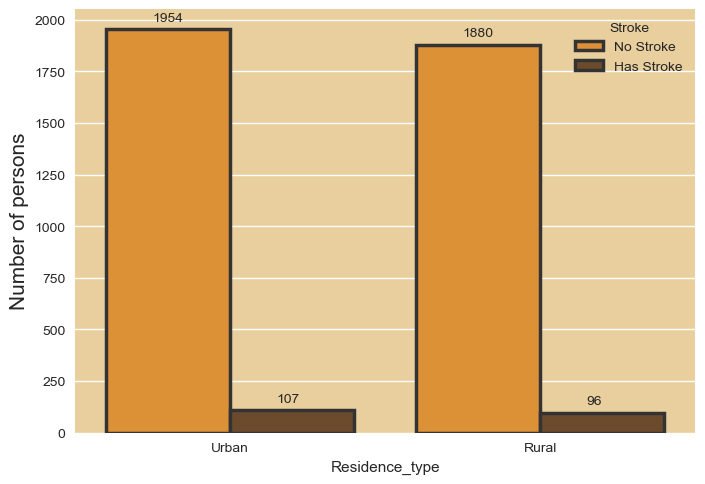

In [891]:
ax=sns.countplot(x='Residence_type', data=stroke_Final, hue =stroke_Final['stroke'], edgecolor='0.2', lw=2.5,  palette=["#F7941C", "#764A23"])
ax.set_facecolor('#E9CF9D')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in ax.patches]
plt.ylabel('Number of persons',fontsize=15)
plt.legend(['No Stroke','Has Stroke'],title='Stroke')
plt.show()

### Smoking_status

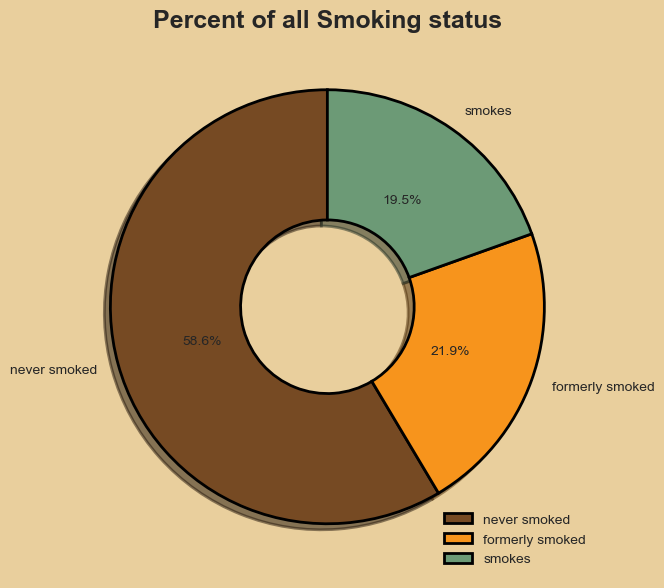

In [892]:
labels = ['never smoked', 'formerly smoked', 'smokes']
fig, ax = plt.subplots(figsize = (7,8))
plt.pie(stroke_Final["smoking_status"].value_counts(),labels=labels, autopct='%1.1f%%',radius =1, colors=[ "#764A23", "#F7941C","#6C9A76"], shadow = True, startangle = 90, wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True,
                      "width":0.6})
plt.title("Percent of all Smoking status",fontsize=18,fontweight="bold")
fig.set_facecolor('#E9CF9D')
plt.legend()
plt.show()

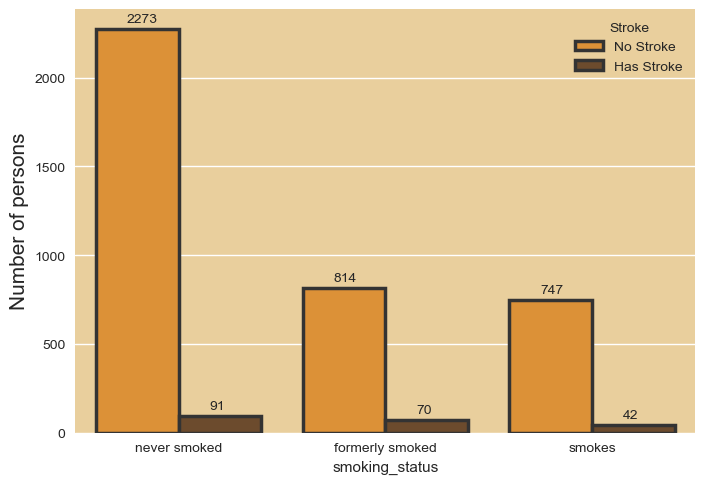

In [893]:
ax=sns.countplot(x='smoking_status', data=stroke_Final, hue =stroke_Final['stroke'], edgecolor='0.2', lw=2.5,  palette=["#F7941C", "#764A23"])
ax.set_facecolor('#E9CF9D')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in ax.patches]
plt.ylabel('Number of persons',fontsize=15)
plt.legend(['No Stroke','Has Stroke'],title='Stroke')
plt.show()

## Average Glucose Level Distribution

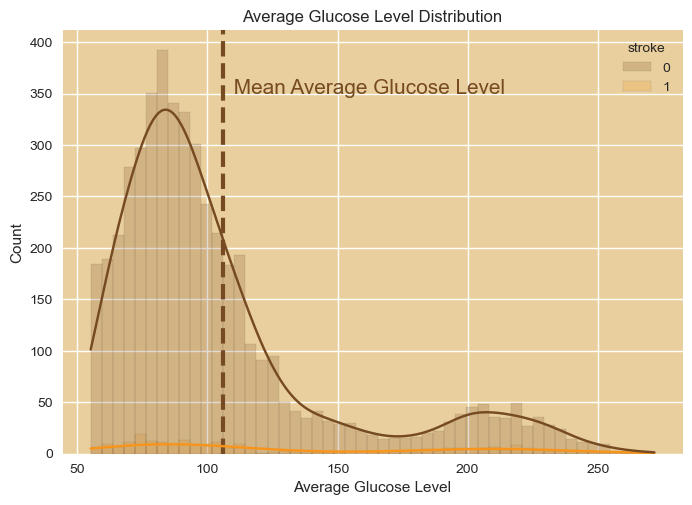

In [894]:
ax = sns.histplot(data=df, x= df['avg_glucose_level'], kde=True,hue=df['stroke'], lw=0.05, alpha=0.2, palette=[ "#764A23", "#F7941C"])
ax.set_facecolor('#E9CF9D')
plt.axvline(df['avg_glucose_level'].mean(), linestyle='--', lw=3, zorder=1, color='#764A23')
plt.annotate(f' Mean Average Glucose Level', (108, 350), fontsize=15,color='#764A23')
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### Correlation Matrix

<AxesSubplot: >

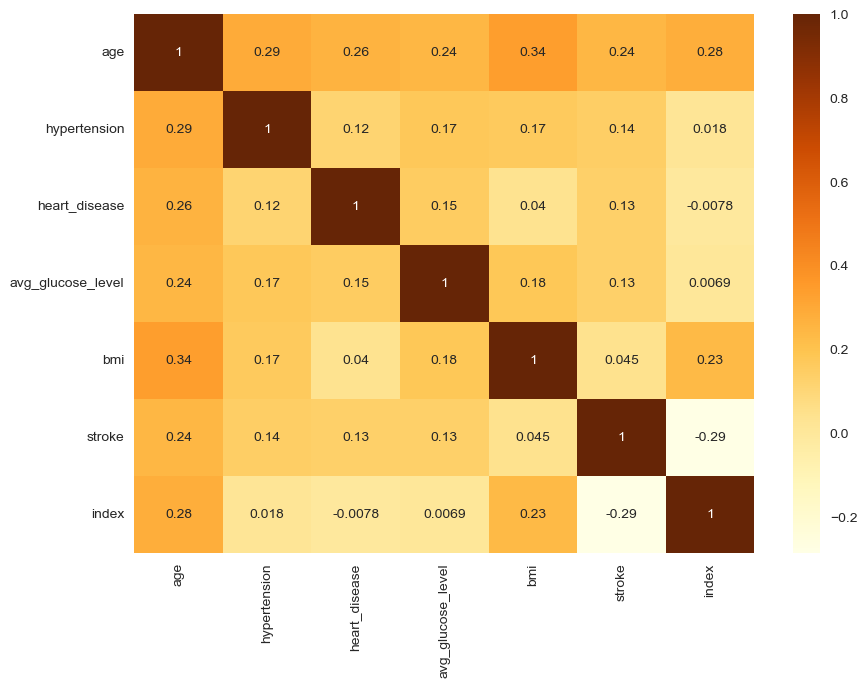

In [895]:
plt.figure(figsize=(10,7))
corrmat = stroke_Final.corr()
colormap=sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(data=corrmat,annot=True, cmap=colormap)

##
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# 3. Model Building

In [896]:
import scipy.stats as stats
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict
from sklearn import metrics

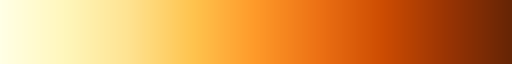

In [897]:
sns.color_palette("YlOrBr", as_cmap=True)

In [898]:
def plot_confusion_matrix(y_true, y_pred, ax):
    if ax is None:
        raise Exception("You must pass an axis object")
    ax.xaxis.grid()
    ax.yaxis.grid()
    cm = metrics.confusion_matrix(y_true, y_pred)
    names = ['True Negative','False Positive','False Negative','True Positive']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt ='', cmap="YlOrBr", ax=ax)
    ax.title.set_text('Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

In [899]:
def plot_precision_recall_curve(y_true, y_pred, ax):
    if ax is None:
        raise Exception("You must pass an axis object")
    precision, recall, _ = metrics.precision_recall_curve(y_true, y_pred)
    pr_auc = metrics.auc(recall, precision)
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.plot(recall, precision, color="#764A23")
    ax.set_facecolor('#E9CF9D')
    ax.title.set_text('Precision-Recall curve')
    ax.legend([f'PR AUC: {pr_auc:.2f}'])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')

In [900]:
def f2(y_true, y_pred):
    return metrics.fbeta_score(y_true, y_pred, beta=2)

f2_score = metrics.make_scorer(f2, greater_is_better=True)

In [901]:
lr = LogisticRegression()
svc = SVC()
sgd = SGDClassifier()
dt = DecisionTreeClassifier()
mlp = MLPClassifier()
models = [lr, svc, sgd, dt, mlp]

In [902]:
lr_params = {
    "penalty": ["l2", "l1", "elasticnet", None],
    "C": np.logspace(-4, 4, 10),
    "l1_ratio": stats.uniform(0, 1)
}
svc_params = {
    "C": np.logspace(-4, 4, 10),
    "kernel": ["linear", "poly", "sigmoid", "rbf"],
    "gamma": ["scale", "auto"]
}
sgd_params = {
    "loss": ["modified_huber", "squared_hinge", "perceptron"],
    "learning_rate": ["constant", "optimal", "invscaling", "adaptive"],
    "l1_ratio": stats.uniform(0, 1)
}
dt_params = {
    "max_depth": list(range(6,10)),
    "max_features" : [2,3,4,"auto","sqrt","log2"],
    "min_samples_leaf": [2,3,4,5],
    "criterion": ["gini", "entropy"]
}
mlp_params = {
    "hidden_layer_sizes": [(100,),(100,100,),(100,100,100,),(50,50,50,50,),(50,50,50,50,50,)],
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd"],
    "learning_rate": ["constant", "invscaling", "adaptive"],
    "learning_rate_init": stats.uniform(0, 1)
}
model_params = [lr_params, svc_params, sgd_params, dt_params, mlp_params]

In [903]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.columns = df.columns.str.lower()
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df = df.replace(' ', '_', regex=True).replace('-', '_', regex=True)
df.replace("children", "never_worked", inplace=True)
df_new = df[df['gender'] != 'other']
df_new.drop(columns=['id'], inplace=True)
df_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly_smoked,1
1,female,61.0,0,0,yes,self_employed,rural,202.21,NaN,never_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.5,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,female,79.0,1,0,yes,self_employed,rural,174.12,24.0,never_smoked,1


In [904]:
X = df_new.drop('stroke', axis=1)
y = df_new['stroke']

In [905]:
numerical_indexes = [X.columns.get_loc(c) for c in X.select_dtypes(exclude=['object']).columns.to_list() if c in X]
categorical_indexes = [X.columns.get_loc(c) for c in X.select_dtypes(include=['object']).columns.to_list() if c in X]

column_transformer = ColumnTransformer(
    [
        ('numerical', Pipeline(
            [
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ]
        ), numerical_indexes),
        ('categorical', OneHotEncoder(), categorical_indexes)
    ],
    remainder="passthrough"
)

In [906]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=20)

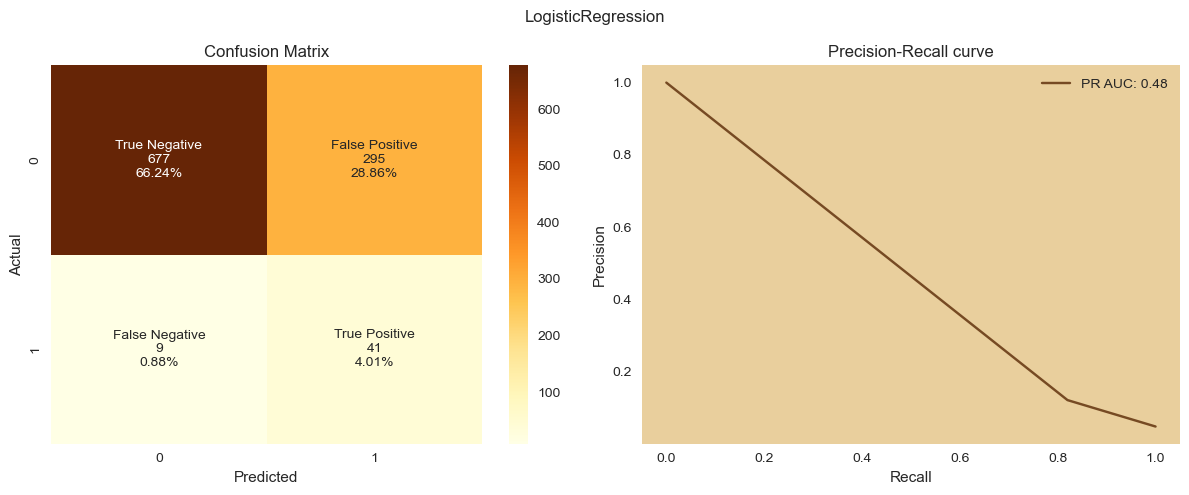

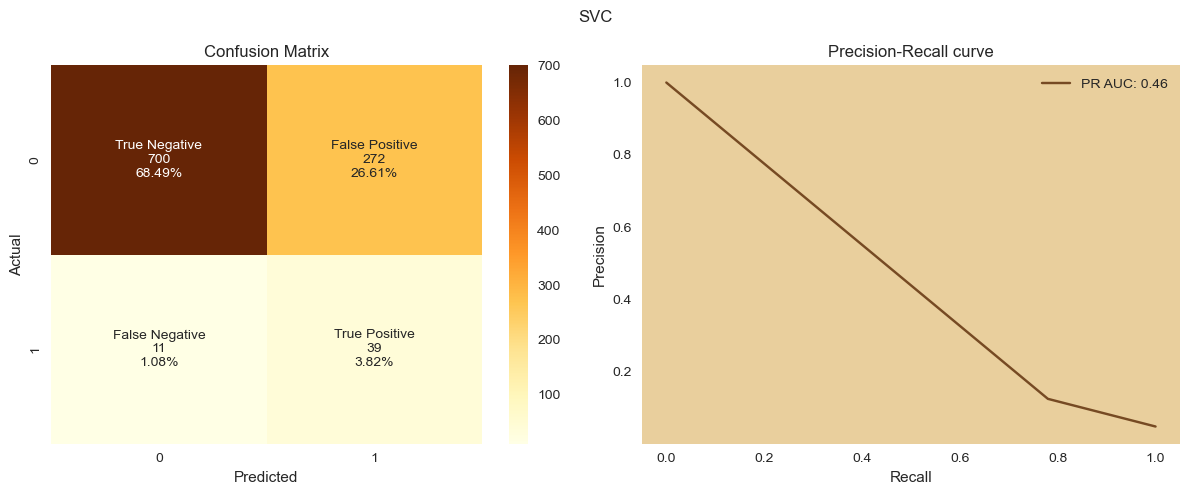

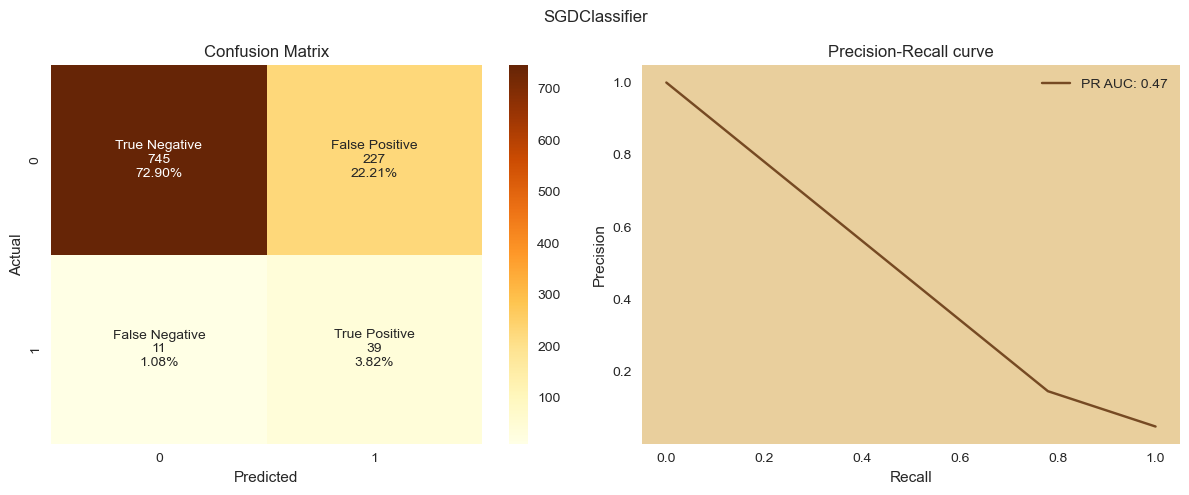

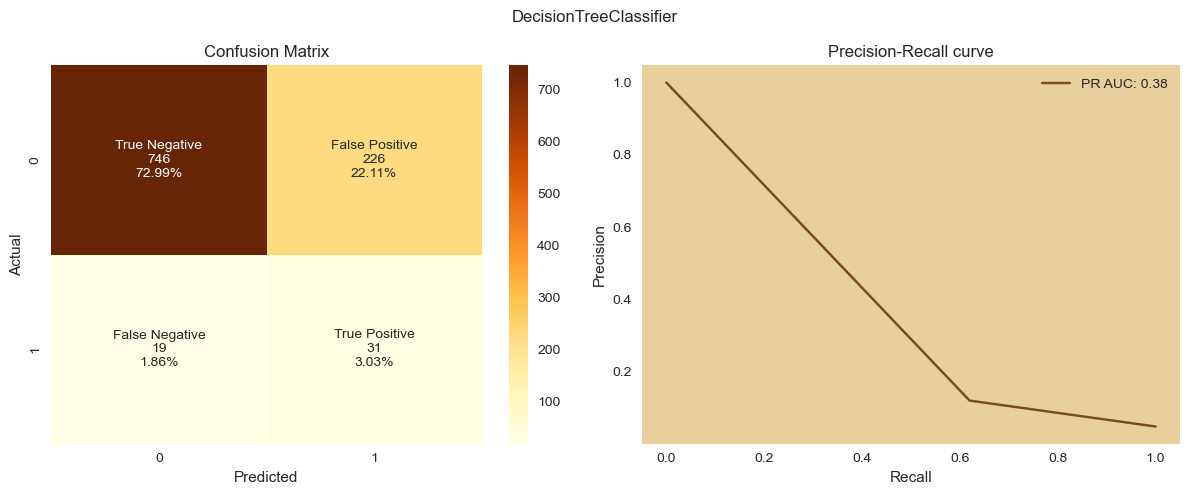

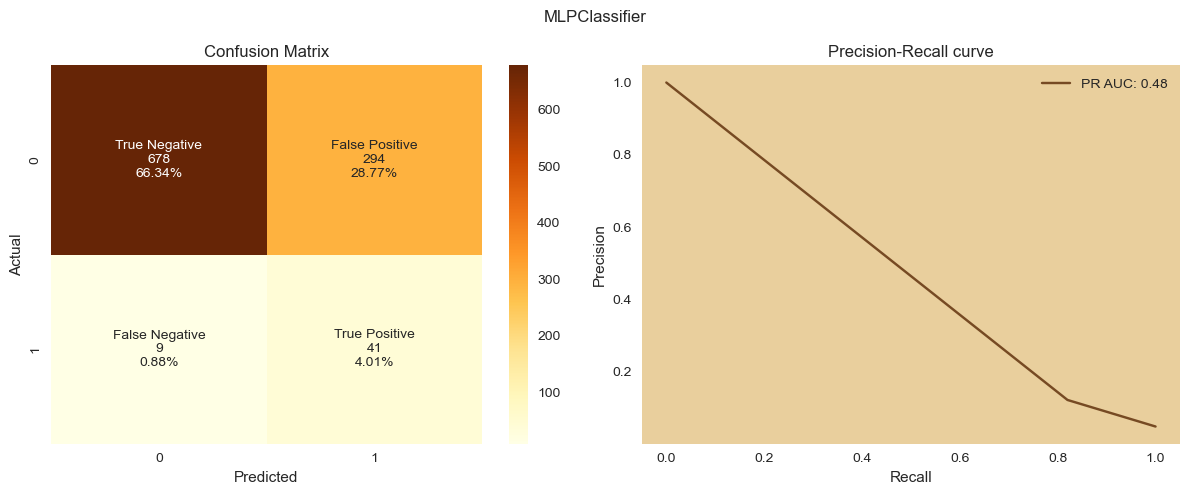

In [907]:
pipelines = []
scores = []
for model, model_param in zip(models, model_params):
    imba_pipeline = Pipeline([
        ("preprocessing", column_transformer),
        ("sampling", SMOTEENN(random_state=50)),
        ("model", model)
    ])
    new_param = {'model__' + key: model_param[key] for key in model_param}
    random_imba = RandomizedSearchCV(imba_pipeline, new_param, refit=True, cv=cv, 
                                     scoring=f2_score, n_jobs=-1, random_state=25)
    random_imba.fit(X_train, y_train)
    y_pred = random_imba.predict(X_test)
    scores.append(f2(y_test, y_pred))
    pipelines.append(random_imba)
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    plot_confusion_matrix(y_test, y_pred, axs[0])
    plot_precision_recall_curve(y_test, y_pred, axs[1])
    plt.suptitle(type(model).__name__)
    plt.tight_layout()
    plt.savefig(f"{type(model).__name__}.png")
    plt.show()  

In [908]:
best_pipeline = pipelines[scores.index(max(scores))]
file_name = 'pipeline.pkl'
joblib.dump(best_pipeline, file_name)

['pipeline.pkl']